___
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://www.techexplorist.com/wp-content/uploads/2023/05/human-dna-1024x683.jpg" width="300px" height="180px" />


# <font color= #bbc28d> **DNA Alignment Sequence** </font>
#### <font color= #2E9AFE> `Lab 1 – Text Mining`</font>
- <Strong> Sofía Maldonado, Diana Valdivia & Viviana Toledo </Strong>
- <Strong> Fecha </Strong>: 21/09/2025 

___

<p style="text-align:right;"> Imagen recuperada de: https://www.techexplorist.com/wp-content/uploads/2023/05/human-dna-1024x683.jpg</p>

In [2]:
# Libraries
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import Entrez, SeqIO
import random

# <font color= #bbc28d> **Homosapiens Mitochondrial DNA** </font>

In [114]:
# We will use the Biopython Library to simplify getting the sequences
# Using the BRAC2 gene, a well-known gene which is considered a tumor supressor

random.seed(42)

brac2_id = "NC_000013.11"

Entrez.email = ""

handle1 = Entrez.efetch(db="nucleotide", id=brac2_id, rettype="fasta", retmode="text")
record1 = SeqIO.read(handle1, "fasta")
handle1.close()

# Because of the size of this gene, we will only take small chunks to compare

starting_pos = 31225563
ending_pos = starting_pos + 100 # length of 1k bp

#Shuffled segments

original_sequence = record1.seq[starting_pos:ending_pos]

segvar2_l = list(original_sequence[201:500])
random.shuffle(segvar2_l)
segvar2 = "".join(segvar2_l)
full_shuffle = list(original_sequence)
random.shuffle(full_shuffle) 

variant_1 = original_sequence[:500] + "A" + original_sequence[:501] # Simple substitution
variant_2 = original_sequence[:200] + segvar2 + original_sequence[:501] # Variant with 300 shuffled bps
variant_3 = original_sequence[::-1] # The original sequence but reversed
variant_4 = "".join(full_shuffle) # The original sequence, completely shuffled (the seed can be changed at the top)
variant_5 = original_sequence[:200] + original_sequence[205:500] + "GATA" + original_sequence[504:] # The original sequence with a small deletion and substitution

In [8]:
pairs = {'pair1': ('GACTTACGCGCCGTAGCACTTCTGTGATAGCTGCGAGGCGTATTGCTACTTGTACGAGATAGGGTCGACTTTTCGGAGTCGACAGACACTACGATACT',
                   'AGTATCGTAGTGTCTGTCGACTCCGAAAAGTCGACCCTATCTCGTACAAGTAGCAATACGCCTCGCAGCTATCACAGAAGTGCTACGGCGCGTAAGTC'),
         'pair2': ('GTAGTCATTACCCATAGGCGTTTGCTGACTATCGGGAGAGGTACGTACGTGATACGACTGTCGATCGCTCGTAGATCAAGATACTCAGCGTGCTGTC',
                   'GACAGCACGCTGAGTATCTTGATCTACGATCGACAGTCGTATCACGTACGTACCTCTCCCGATAGTCAGCAAACGCCTATGGGTAATGACTAC'),
         'pair3': ('CTGCATACCGACAAACGTGTGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCACATGCATACGTGCGTGTCTACGTACGT',
                   'ACGTACGTCTACGCACGTATGCATGTGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCACACGTTTGTCGGTATGCAG'),
         'pair4': ('GGATGCGACTAGGAGTCGAGTGTCGATTCTATAGCGATAGCGAGTAGCGACTAGTCACTGTACTGTAGCATAGCGATACGAGCATAGCATAGCA',
                   'TGCTATGCTATGCTCGTATCGCTATGCTACAGTGACTAGTCGCTACTCGCTATCGCTATAGAATCGACACTCGACTCCTAGTCGCATCC'),
         'pair5': ('TCGATCGTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGC',
                   'GCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTACGATCGAC'),
         'pair6': ('ATGCGTATACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACG',
                   'CGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTATACGCAT'),
         'pair7': ('TTAAATTATATATATACGCGCGCGCGACACACACACACTGATCTATACGCGCGCGCGCGATAGCGATAGCGATCGATCGCGCTATATATATA',
                   'TATATATAGCGCGATCGATCGCTATCGCTATCGCGCGCGCGTATAGATCAGTGTGTGTGTGTCGCGCGCGCGTATATATATAATTTAA'),
         'pair8': ('CTACTGAGTCGTAGCTAGCGAGTCGAGTGCGTGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGC',
                   'GCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCACGACTCGACTCGCTAGCTACGACTCAGTAG'),
         'pair9': ('GCATGCGACTTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCATGC',
                   'GCATGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAAGTCGCATGC'),
         'pair10': ('CGCGATAGCGATAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAG',
                    'CTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTATCGCTATCGCG')}

# <font color= #bbc28d> **Needleman-Wunsch Algorithm** </font>

In [5]:
def needleman_wunsch(seq1, seq2, MATCH_SCORE, MISMATCH_PENALTY, GAP_PENALTY):

    start = time.perf_counter()

    def similarity(a,b, MATCH_SCORE, MISMATCH_PENALTY):
        if a == b:
            return MATCH_SCORE
        else:
            return MISMATCH_PENALTY

    # Creating the empty matrix
    nwm = np.zeros((len(seq1) + 1,len(seq2) + 1))

    # Assigning starter values
    for i in range(nwm.shape[0]):
        for j in range(nwm.shape[1]):
            nwm[i,0] = GAP_PENALTY * i
            nwm[0,j] = GAP_PENALTY * j   

    #Filling out the rest of the matrix
    for i in range(1,nwm.shape[0]):
        for j in range(1, nwm.shape[1]):            
            top_value = nwm[i-1,j] + GAP_PENALTY
            left_value = nwm[i, j-1] + GAP_PENALTY

            if seq1[i-1] == seq2[j-1]:
                diagonal_value = nwm[i-1, j-1] + MATCH_SCORE
            else:
                diagonal_value = nwm[i-1, j-1] + MISMATCH_PENALTY

            nwm[i,j] = max(top_value, left_value, diagonal_value)
    
    #Traceback

    sequence1 = ''
    sequence2 = ''
    path_x = []
    path_y = []

    i, j = len(seq1), len(seq2)

    while (i > 0 or j > 0):
        path_x.append(i)
        path_y.append(j)

        if (i > 0 and j > 0 and nwm[i,j] == nwm[i-1,j-1] + similarity(seq1[i-1], seq2[j-1], MATCH_SCORE, MISMATCH_PENALTY)):
            sequence1 = seq1[i-1] + sequence1
            sequence2 = seq2[j-1] + sequence2
            i -= 1
            j -= 1
        elif (i > 0 and nwm[i,j] == nwm[i-1, j] + GAP_PENALTY):
            sequence1 = seq1[i-1] + sequence1
            sequence2 = '-' + sequence2
            i -= 1
        else:
            sequence1 = '-' + sequence1
            sequence2 = seq2[j-1] + sequence2
            j -= 1
    
    score = nwm[len(seq1), len(seq2)]
    time_taken = time.perf_counter() - start # The time taken to visualize the graph is not considered as time to complete the algorithm, so the timer stops here

# Gráfica
    fig = plt.figure(figsize=(8,8))
    sns.heatmap(nwm, xticklabels=[], yticklabels=[])
    plt.plot([x + 0.5 for x in reversed(path_x)],
             [y + 0.5 for y in reversed(path_y)],
             linewidth = 2, color='green')
    
    plt.title(f"Needleman-Wunsch - SCORE = {score}, \n Match Score = {MATCH_SCORE}, Mismatch Penalty = {MISMATCH_PENALTY}, Gap Penalty = {GAP_PENALTY}")
    # Guardar la figura
    #plt.savefig(f'results/Needleman-Wunsch/{seq2[2]}_MA_{MATCH_SCORE}_MP_{MISMATCH_PENALTY}_GP_{GAP_PENALTY}.png', format='png')
    #plt.show()

    return nwm, sequence2, sequence1, score, time_taken, fig

[(21.0, 'pair1'), (39.0, 'pair1_reverse'), (50.0, 'pair2'), (46.0, 'pair2_reverse'), (35.0, 'pair3'), (33.0, 'pair3_reverse'), (38.0, 'pair4'), (42.0, 'pair4_reverse'), (30.0, 'pair5'), (25.0, 'pair5_reverse'), (32.0, 'pair6'), (11.0, 'pair6_reverse'), (12.0, 'pair7'), (14.0, 'pair7_reverse'), (28.0, 'pair8'), (38.0, 'pair8_reverse'), (35.0, 'pair9'), (34.0, 'pair9_reverse'), (29.0, 'pair10'), (16.0, 'pair10_reverse')]


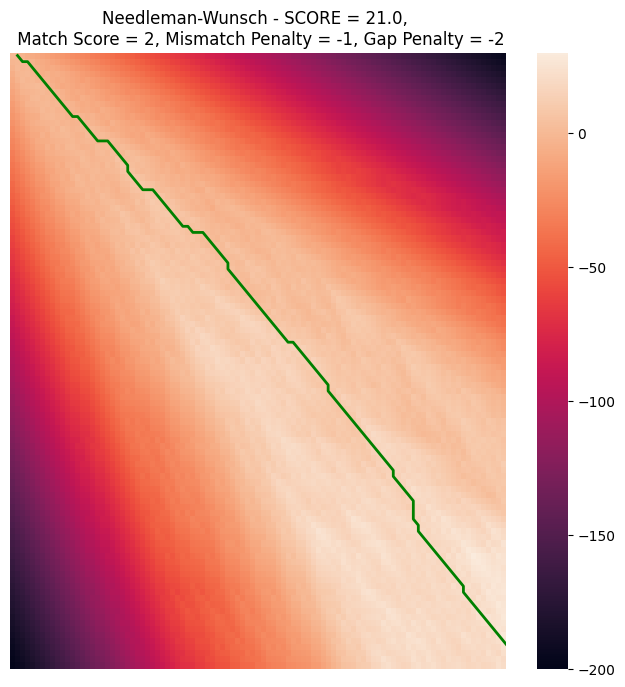

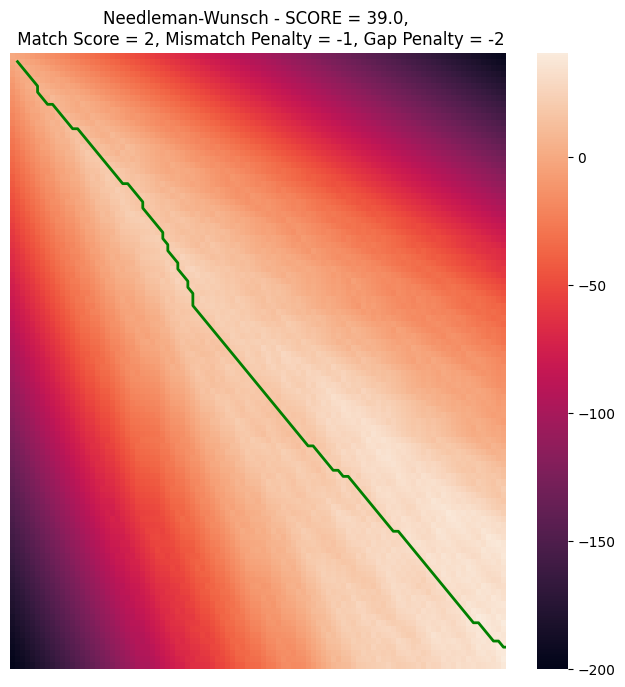

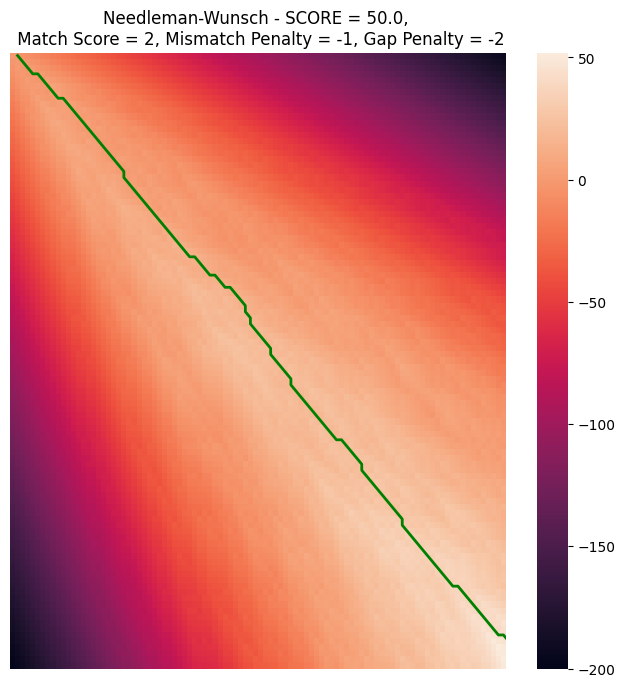

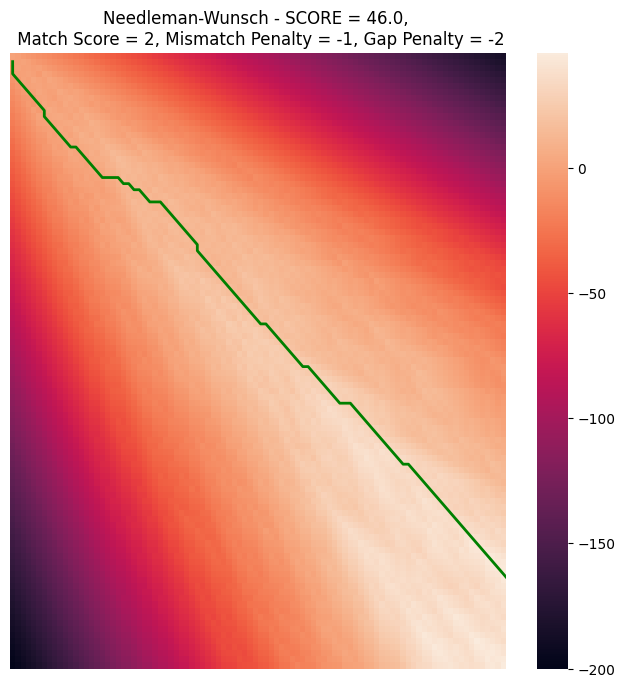

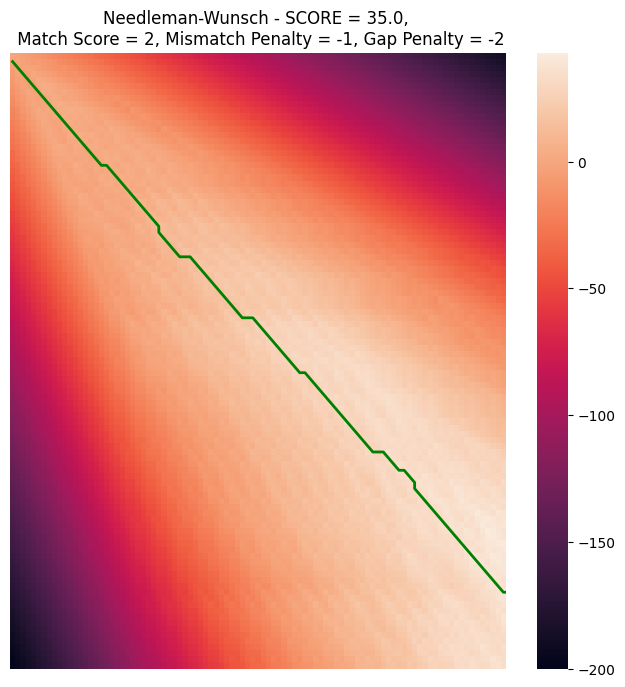

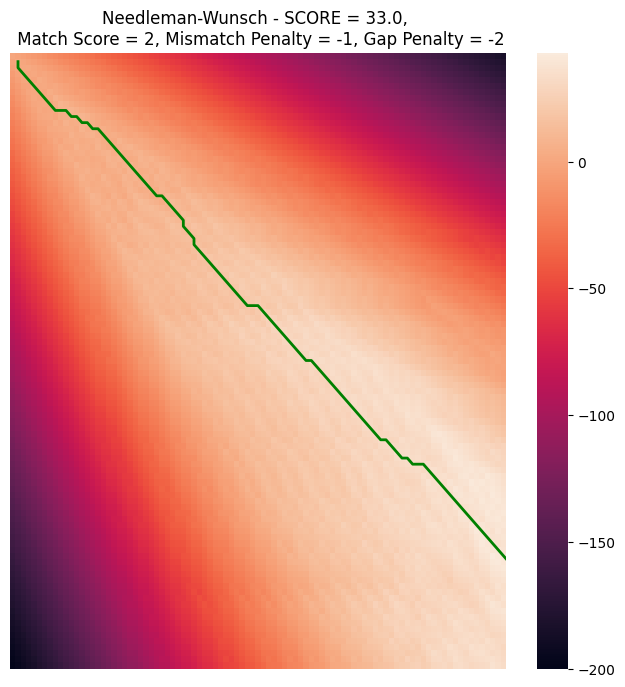

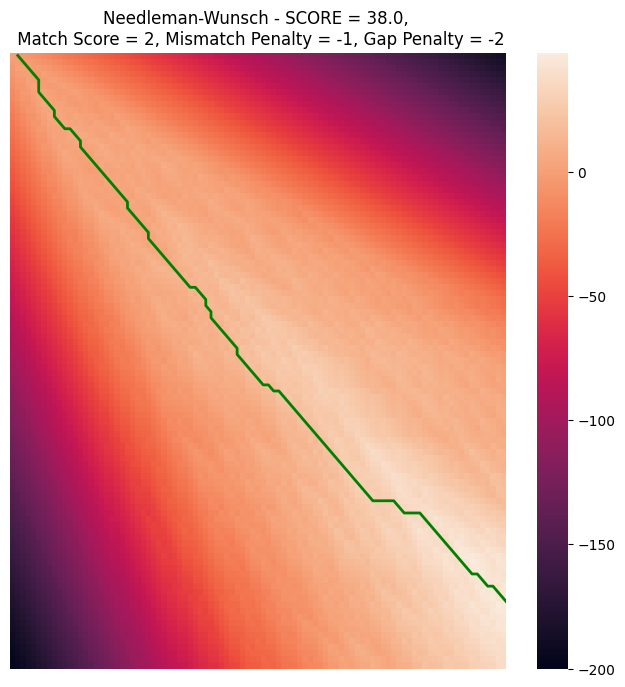

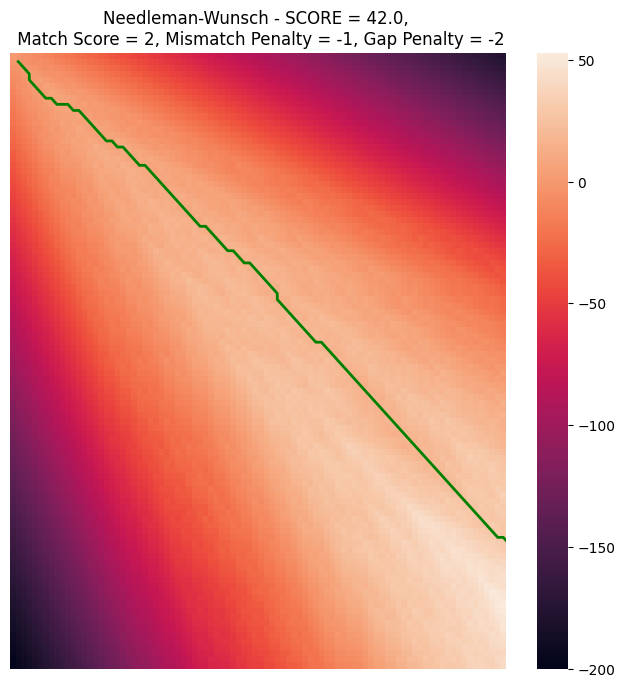

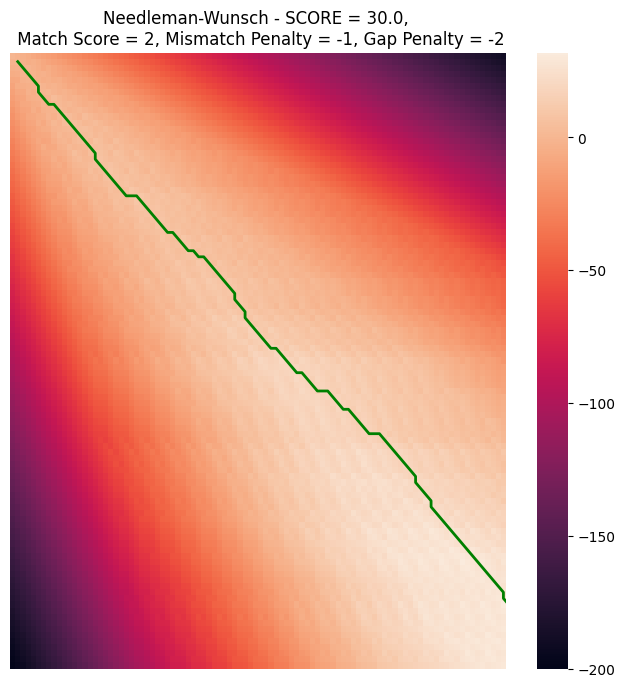

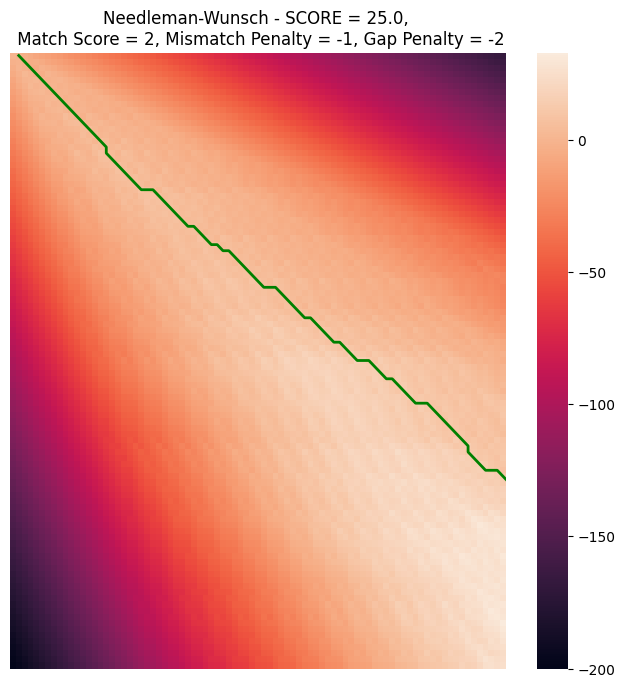

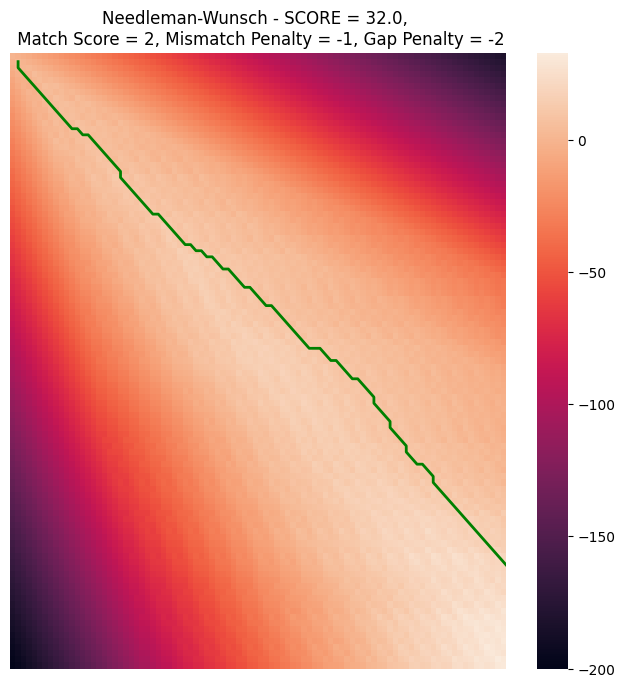

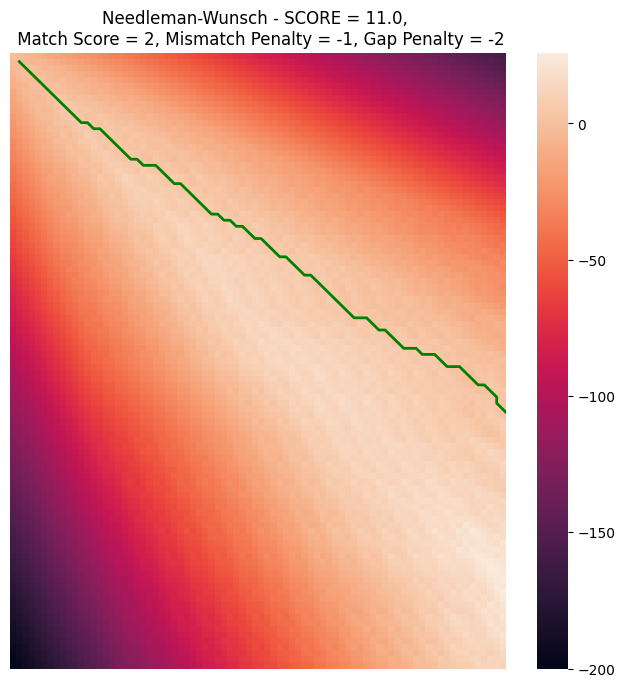

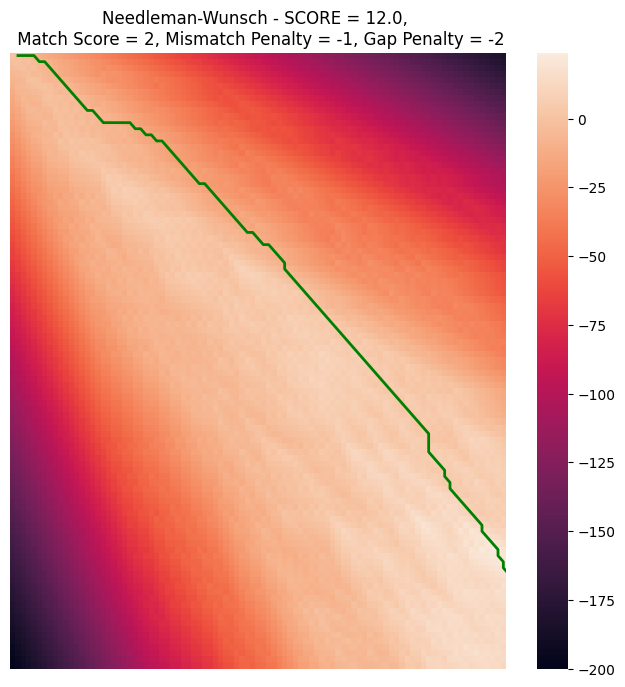

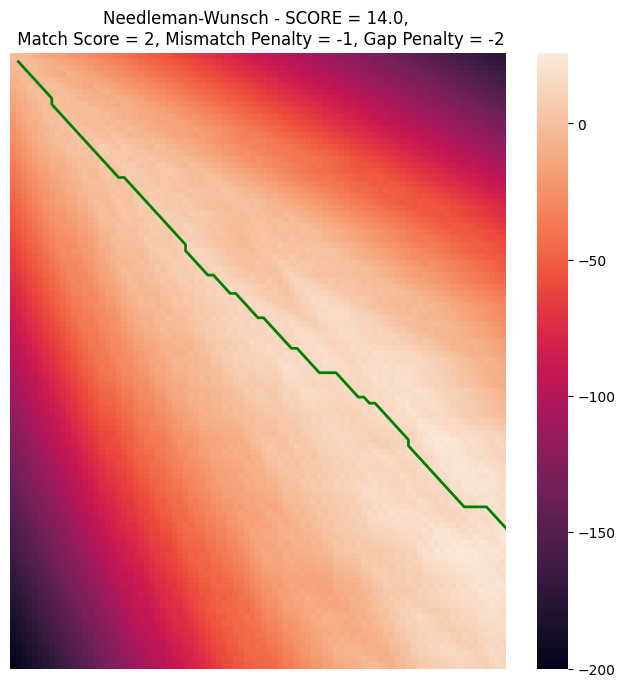

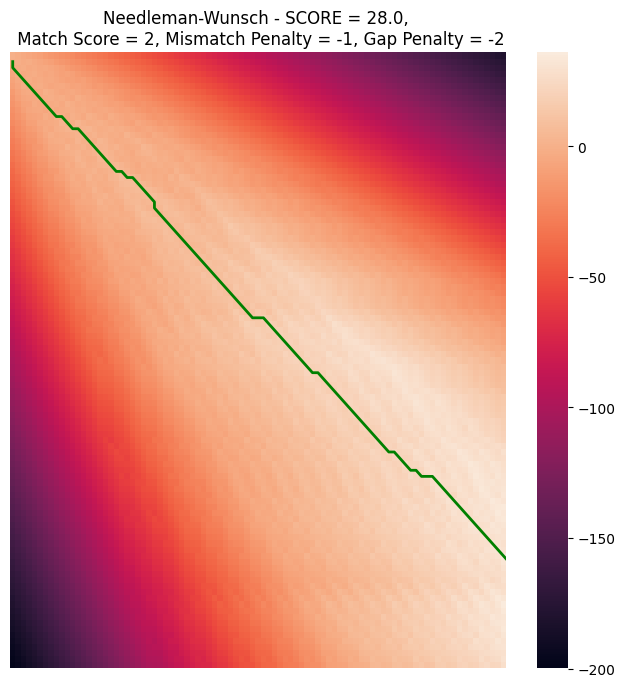

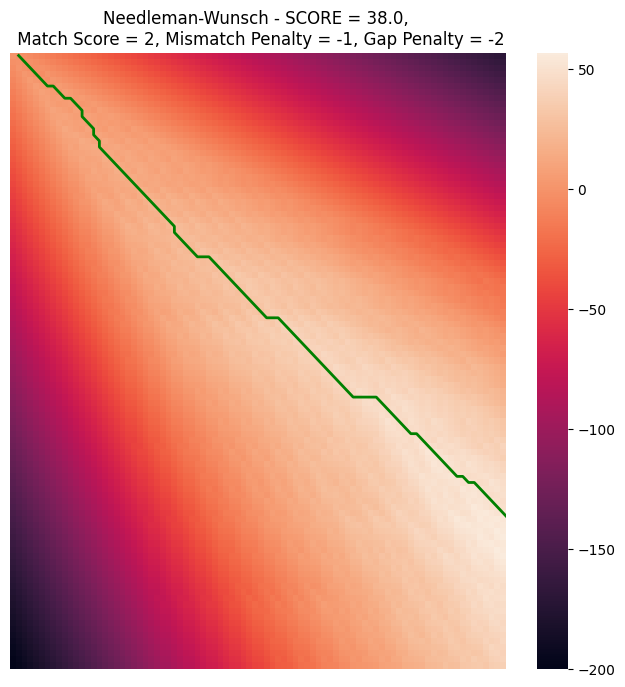

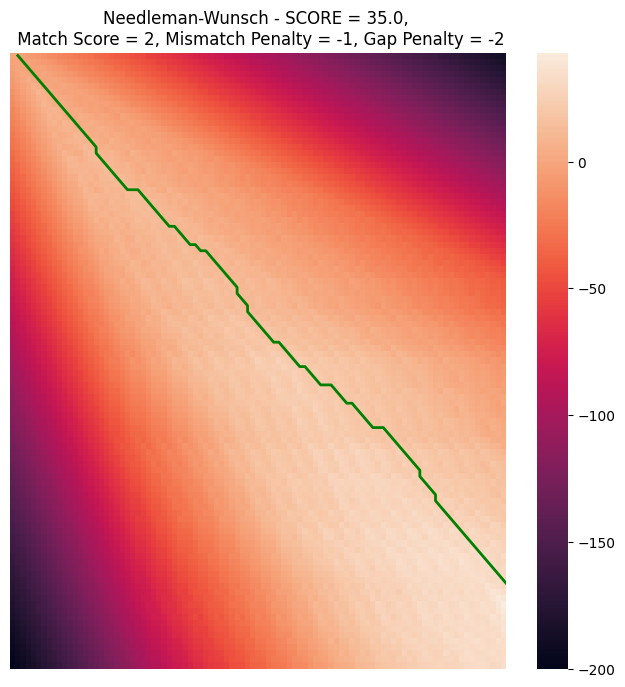

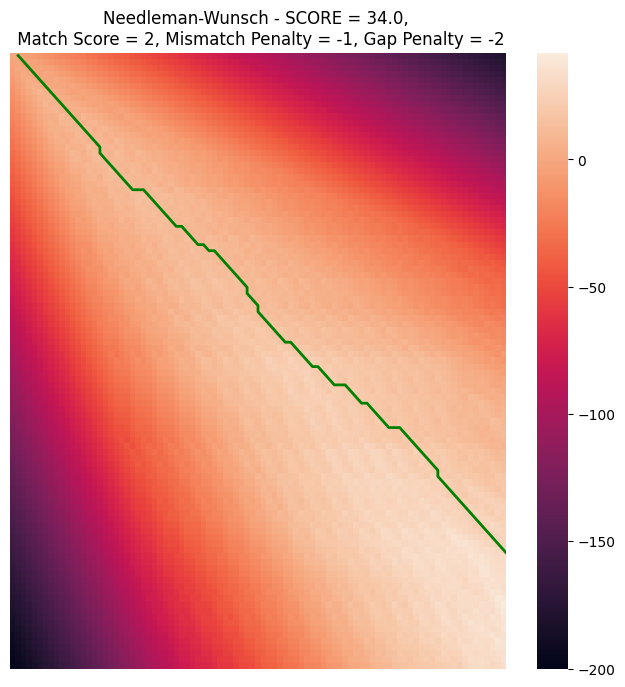

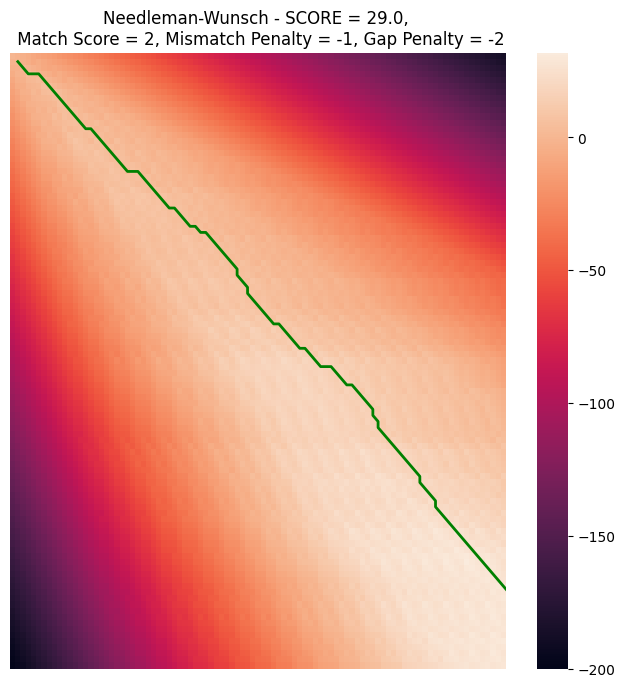

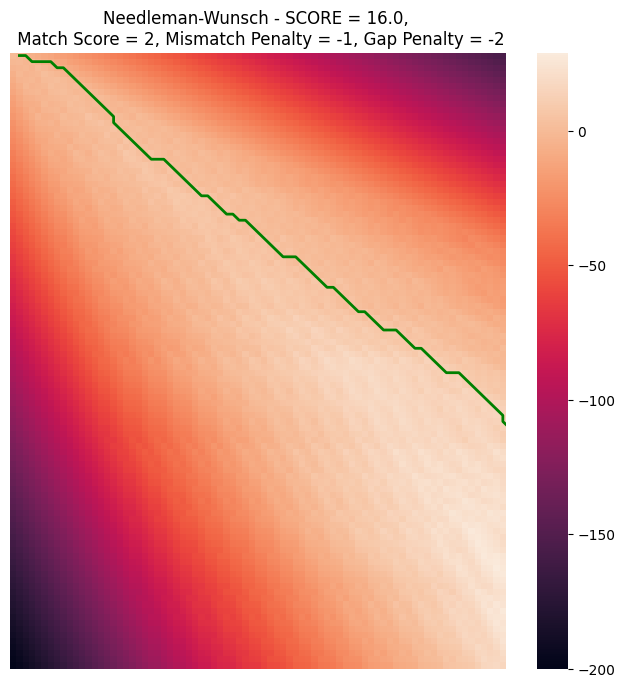

In [115]:
results = []

for i in range(1, len(pairs)+1):    
    llave = f'pair{i}'
    algorithm_og = needleman_wunsch(original_sequence, pairs[llave][0], 2, -1, -2)
    algorithm_reverse = needleman_wunsch(original_sequence, pairs[llave][1], 2, -1, -2)

    score_og = algorithm_og[3]
    score_reverse = algorithm_reverse[3]

    results.append((score_og, f"pair{i}"))
    results.append((score_reverse, f"pair{i}_reverse"))

print(results)

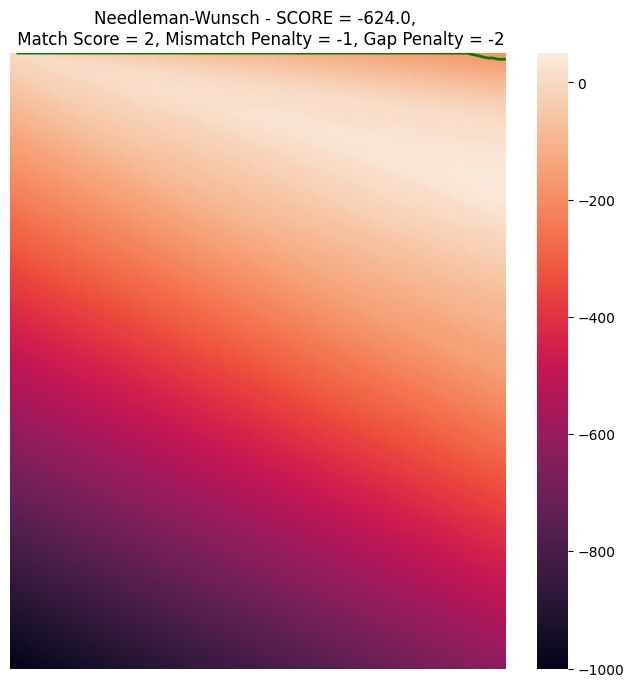

In [6]:
aligned_1 = needleman_wunsch(original_sequence,pair4[0],2,-1,-2)[5]

In [28]:
print(f"===Aligned Sequence: {aligned_1[1]}")
print(f"===Aligned Sequence: {aligned_1[2]}")
print(f"===Alignment Score: {aligned_1[3]}")
print(f"===Time Taken: {aligned_1[4]:.10f}")

===Aligned Sequence: AGACTCCGGAGAGGTCTCTTACAGC-GTAATGACTACCGTTAAACTGCCCGGTCAGGAGT-CCA---TCGGTCGTAGG-GTGTGACGGGGAGGAGAGA-CATAGGGAAGCATACCGGGAAGTCAGACGAGG-CTGAGACGGGTCGGGGATCTGTGACCAGAAGGGCGTCCCGG-GTACCGAAGGGGA-C-C-TTCG--TCGTGGAAGTTCGAAGATC-GGT-GATGG--ATACA--TA-C---GACGACTGAGAGTTTA-GA-TGGTAGAAG-ACCGGTT--TAGAAAGAGGACTCGCA--TTTTGTTTATAGGTCGGAGGTC-GAT-GAGTGTGGGAGTGAAGTCTAT--ACT-GTGGGTTTCAGTAGTAGTGGGAGATTTGGA-CTCTTGGACAGGAGTTA-G-A-GTGAGTCGTCGG-GGT-GGAGTAGACTCAGGGTCGACCTTCGCAGGGACGG-T-AAGA--GAGGT-CGGAC-CCA-GGTAG-AGGGTGGTAAGACCGGGACGTCGTGGGGA-TGCGGTGGGGGTCGGTCTAGGTACCGGGACAGGGGT-C-G--GGTCCCGAAGAGTTTGACGACACCACCTCCCGTGTGTCGTCAGACGTTGGGCGGGACACGTCGTACCGGG-TTCTGATCAGGGTGCTGGAATCTTACTCCAAGGAGCG-GGTCAGG-ACCGAGAGAAT-TACGGT-AAGAGGGATTCCGGTGGTCCCCTACCAAAATTTTGTGTTTGAGATGGTCCAGATGAGGGATTGCCGTGAGGGACCATCATTAG-GAGTTGGTTCCCCGTGAAAATTGACATTATCTCTG-GTCCCAGTGACGATGTACATAACGGTCTCTGCTCTCTACGATTTGTGGACATATGGTTTCTCTATGTGGAGTCTTATGGTCCTCCCGGGAG-TCTCT-TCGGGGGTCTCTTCGGACCGAGGGGTCTCCTGTATGTTAAGACGCACTGGTACTAGGTAGGA-

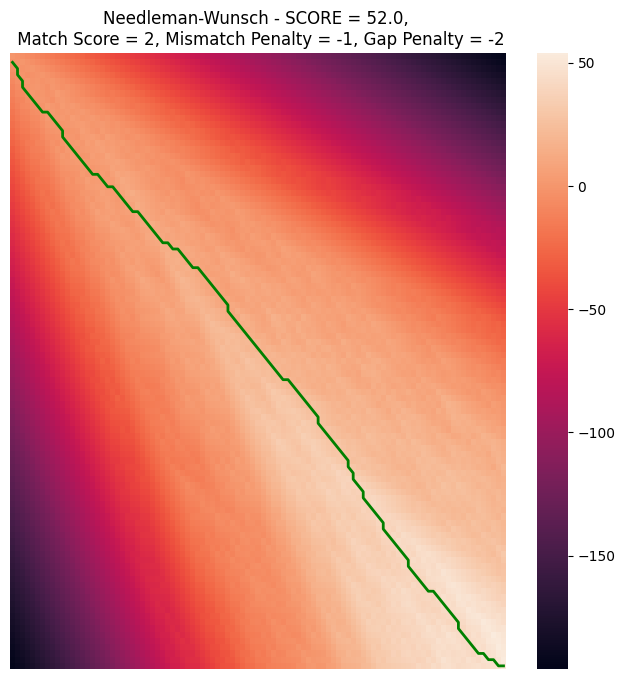

Aligned 1, pair 1 Sequence: AGTATCGTA-GTGTCTGTCG-AC-TCCG-AAAAG-T-CGA-CCCTATCTCGTACAAGTA-GCAATACGCCTCGCAGCTATCACAGAAGTGCTAC-GGCGCGTAAG-T-C-
Aligned 1, pair 1 Sequence: -G-A-CTTACGCG-CCGTAGCACTTCTGTGATAGCTGCGAGGCGTAT-TGCTACTTGTACGAGATA-GGGTCG-A-CT-TTTC-GGAGT-CGACAGACAC-TACGATACT
Alignment Score: 52.0
Time Taken: 0.0191107000


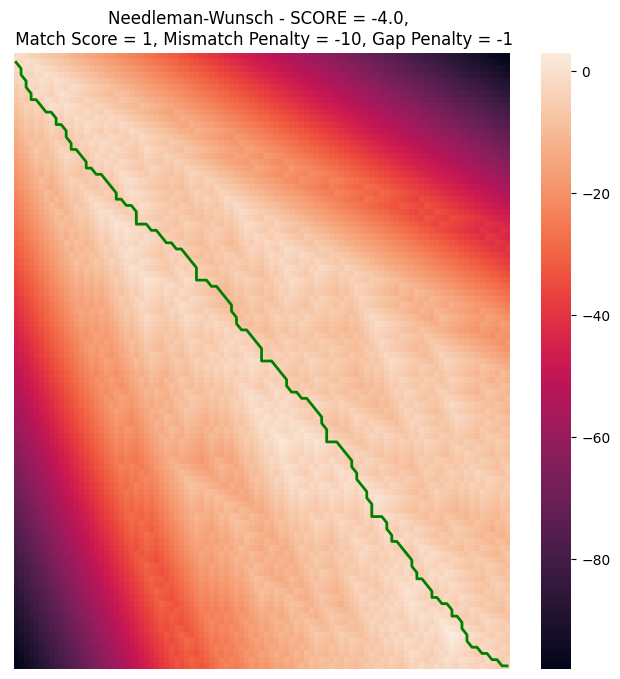

Aligned 2, pair 1 Sequence: AGTATCG-TA-GT-GTCT-GTC-G-ACTC-C-GAA--A-AG-T-CGACC--C-TATCTCG-TACAA--GTAGC-A-ATACGCC--TCGCAGCTATCA--CAGA-AGTGCT-ACG-G-CG-CGTAA-G-T-C-
Aligned 2, pair 1 Sequence: -G-A-C-TTACG-CG-C-CGT-AGCACT-TCTG--TGATAGCTGCGA--GGCGTAT-T-GCTAC--TTGTA-CGAGATA-G--GGTCG-A-CT-T--TTC-G-GAGT-C-GAC-AGAC-AC-T-ACGATACT
Alignment Score: -4.0
Time Taken: 0.0159445000


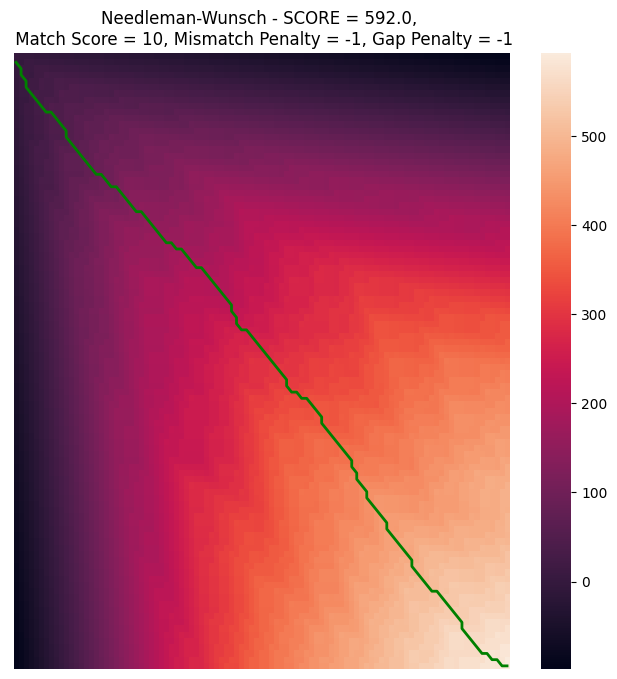

Aligned 3, pair 1 Sequence: AGTATCGTA-GTGTCTGTCG-AC-TCCG-AAAAG-T-CGA-CCCTATCTCG-TACAAGTAGC-A-ATACGCCTCGCAGCTATCACAGAAGTGCTAC-GGCGCGTAAG-T-C-
Aligned 3, pair 1 Sequence: -G-A-CTTACGCG-CCGTAGCACTTCTGTGATAGCTGCGAGGCGTAT-T-GCTACTTGTA-CGAGATA-GGGTCG-A-CT-TTTC-GGAGT-CGACAGACAC-TACGATACT
Alignment Score: 592.0
Time Taken: 0.0153097000


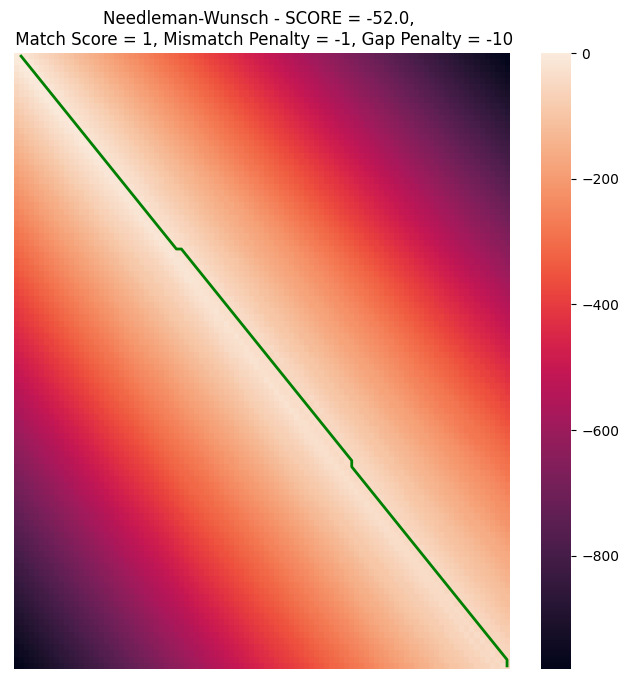

Aligned 4, pair 1 Sequence: -AGTATCGTAGTGTCTGTCGACTCCGAAAAGT-CGACCCTATCTCGTACAAGTAGCAATACGCCTCGCAGCTATCACAGAAGTGCTACGGCGCGTAAGTC
Aligned 4, pair 1 Sequence: GACTTACGCGCCGTAGCACTTCTGTGATAGCTGCGAGGCGTATTGCTACTTGTACGAGATAGGGTCG-ACTTTTCGGAGTCGACAGACACTACGATACT-
Alignment Score: -52.0
Time Taken: 0.0149301000


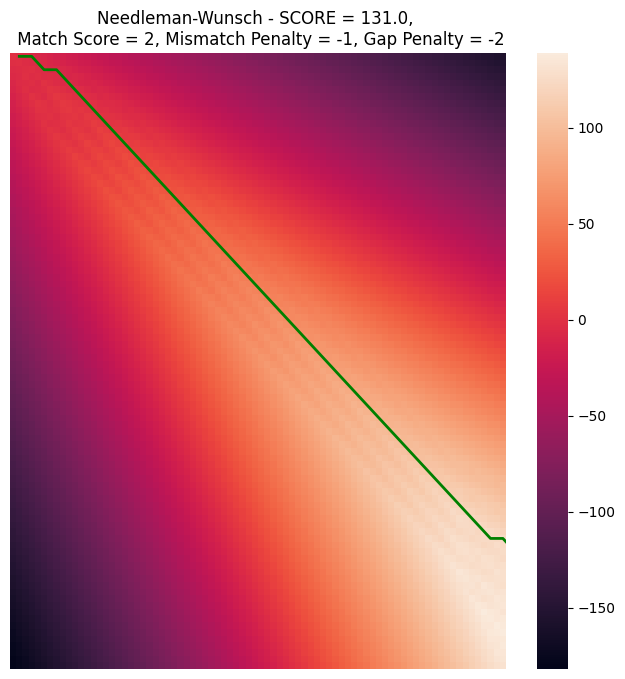

Aligned 1, pair 6 Sequence: ---CG--TACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTA--TACG--C--A-T
Aligned 1, pair 6 Sequence: ATGCGTATACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACG
Alignment Score: 131.0
Time Taken: 0.0113806000


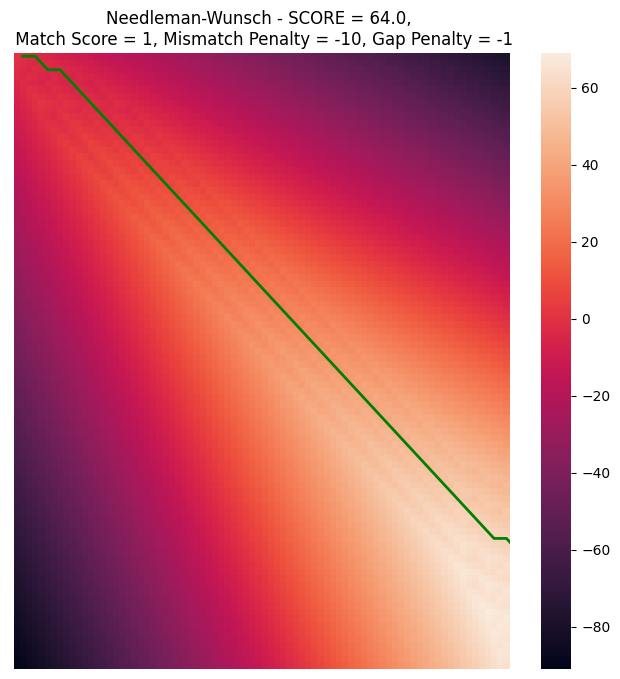

Aligned 2, pair 6 Sequence: ---CG--TACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTA--TACGC-A--T---
Aligned 2, pair 6 Sequence: ATGCGTATACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACG-TACGTACG
Alignment Score: 64.0
Time Taken: 0.0111743000


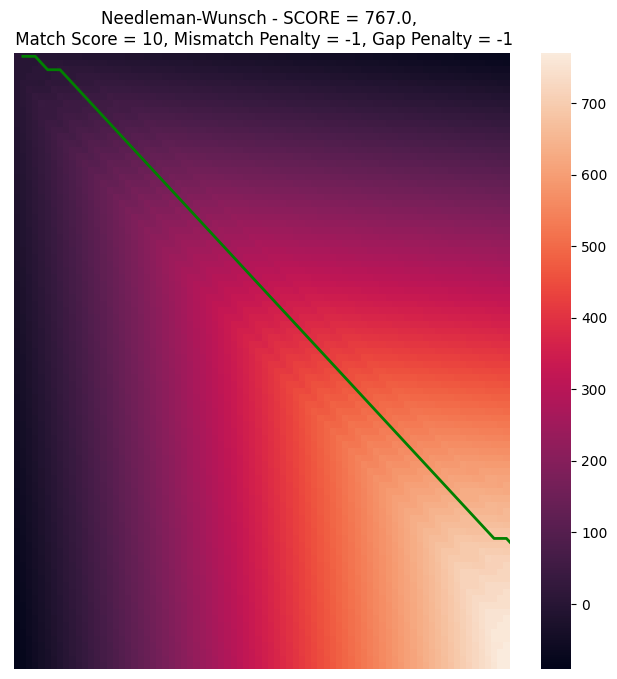

Aligned 3, pair 6 Sequence: ---CG--TACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTA--TACG--C--A-T
Aligned 3, pair 6 Sequence: ATGCGTATACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACG
Alignment Score: 767.0
Time Taken: 0.0110026000


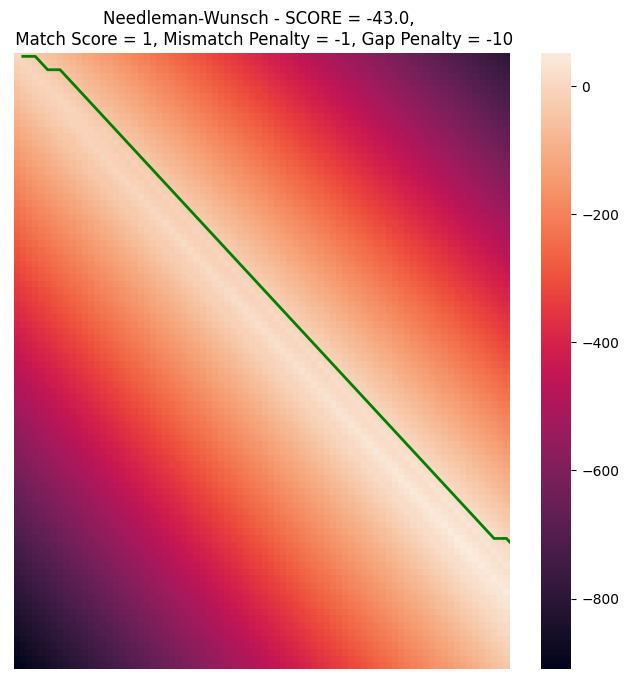

Aligned 4, pair 6 Sequence: ---CG--TACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTA--TACG--C--A-T
Aligned 4, pair 6 Sequence: ATGCGTATACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACG
Alignment Score: -43.0
Time Taken: 0.0115914000


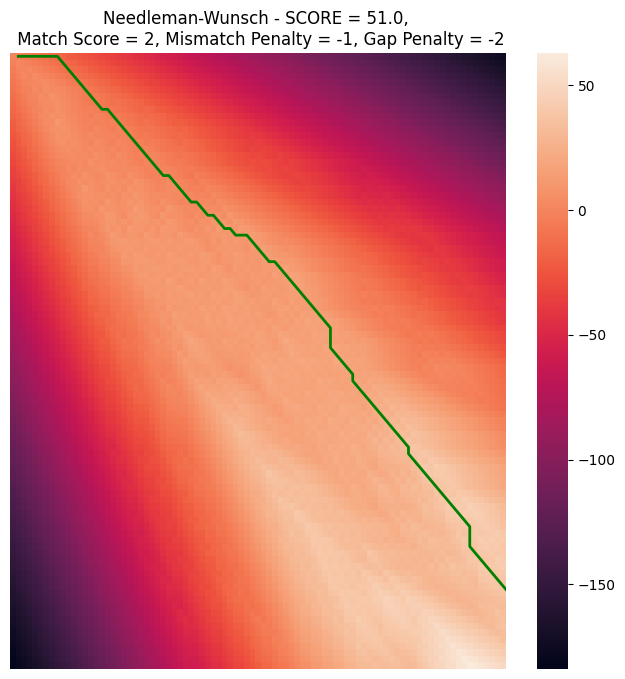

Aligned 1, pair 7 Sequence: --------TATATATA-GCGCGATCGA-TCGC-TA-TC-G--CTAT-CGCGCGCGCGTATAGATCAGTGTGTGTGTGTCGCGCGCGCGTATATATATAATTTAA
Aligned 1, pair 7 Sequence: TTAAATTATATATATACGCGCGCGCGACACACACACACTGATCTATACGCGCGCGCG---CGAT-AGCGATAGCG-ATCGATCGCGC---TATATAT-A--T-A
Alignment Score: 51.0
Time Taken: 0.0127010000


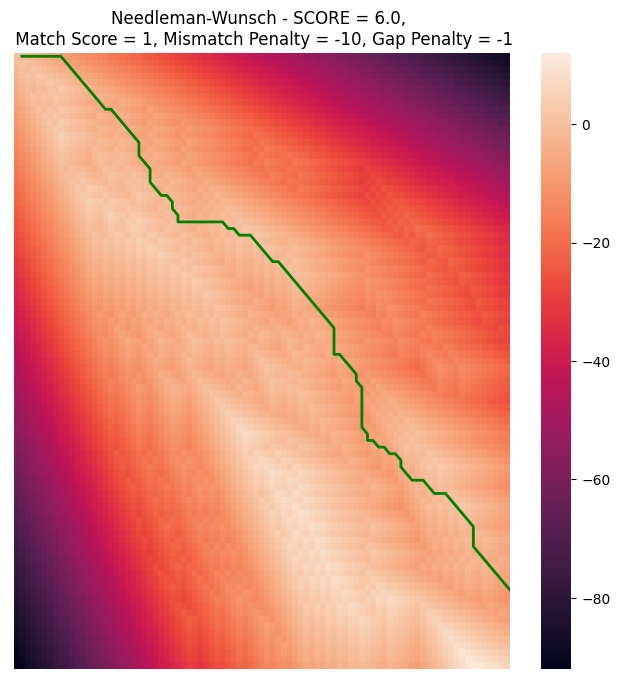

Aligned 2, pair 7 Sequence: --------TATATATA-GCGCGATCGATCG-CTAT--------C-G--CTAT-CGCGCGCGCGTATA-GATCAGTGTGTGT-G-T-GTCG--CG--CGCGCGTATATATATAATTTAA
Aligned 2, pair 7 Sequence: TTAAATTATATATATACGCGCG--CG--CGAC-A-CACACACACTGATCTATACGCGCGCGCG----CGAT-A------G-CGATAG-CGATCGATCGCGC---TATATAT-A--T-A
Alignment Score: 6.0
Time Taken: 0.0128321000


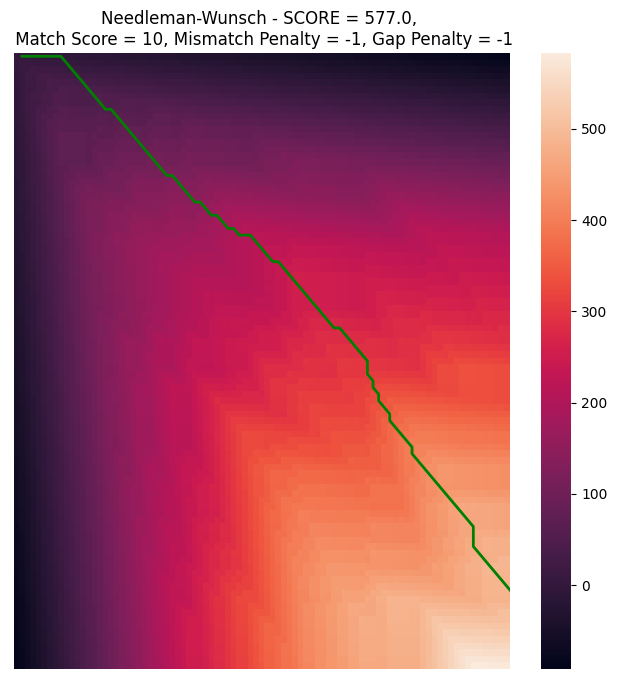

Aligned 3, pair 7 Sequence: --------TATATATA-GCGCGATCGA-TCGC-TA-TC-G--CTAT-CGCGCGCGCG-TATAGATCAGTGTGTGTGTGTCGCGCGCGCGTATATATATAATTTAA
Aligned 3, pair 7 Sequence: TTAAATTATATATATACGCGCGCGCGACACACACACACTGATCTATACGCGCGCGCGCGATAG--C-G-AT-AGCG-ATCGATCGCGC---TATATAT-A--T-A
Alignment Score: 577.0
Time Taken: 0.0124914000


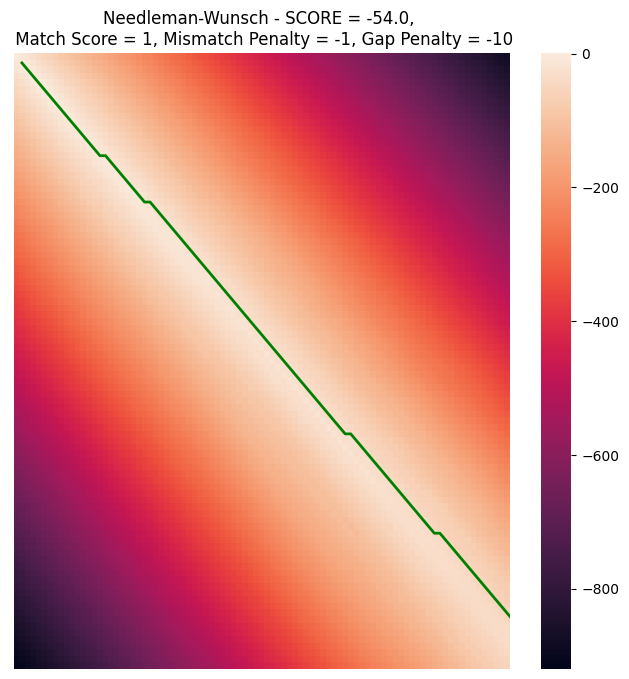

Aligned 4, pair 7 Sequence: TATATATAGCGCGAT-CGATCGC-TATCGCTATCGCGCGCGCGTATAGATCAGTGTGTG-TGTGTCGCGCGCGCG-TATATATATAATTTAA
Aligned 4, pair 7 Sequence: TTAAATTATATATATACGCGCGCGCGACACACACACACTGATCTATACGCGCGCGCGCGATAGCGATAGCGATCGATCGCGCTATATATATA
Alignment Score: -54.0
Time Taken: 0.0127405000


In [ ]:
pairs = [["GACTTACGCGCCGTAGCACTTCTGTGATAGCTGCGAGGCGTATTGCTACTTGTACGAGATAGGGTCGACTTTTCGGAGTCGACAGACACTACGATACT",
          "AGTATCGTAGTGTCTGTCGACTCCGAAAAGTCGACCCTATCTCGTACAAGTAGCAATACGCCTCGCAGCTATCACAGAAGTGCTACGGCGCGTAAGTC", 1], # Par 1
          ["ATGCGTATACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACG",
           "CGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTATACGCAT", 6], # Par 6
           ["TTAAATTATATATATACGCGCGCGCGACACACACACACTGATCTATACGCGCGCGCGCGATAGCGATAGCGATCGATCGCGCTATATATATA",
            "TATATATAGCGCGATCGATCGCTATCGCTATCGCGCGCGCGTATAGATCAGTGTGTGTGTGTCGCGCGCGCGTATATATATAATTTAA", 7]] # Par 7

for i in pairs:
    aligned_1 = needleman_wunsch(i[0], i[1], 2, -1, -2) # Probando con los valores del profe
    print(f"Aligned 1, pair {i[2]} Sequence: {aligned_1[1]}")
    print(f"Aligned 1, pair {i[2]} Sequence: {aligned_1[2]}")
    print(f"Alignment Score: {aligned_1[3]}")
    print(f"Time Taken: {aligned_1[4]:.10f}")

    aligned_2 = needleman_wunsch(i[0], i[1], 1, -10, -1) # Probando con MATCH = 1, MISMATCH = -10, GAP = -1
    print(f"Aligned 2, pair {i[2]} Sequence: {aligned_2[1]}")
    print(f"Aligned 2, pair {i[2]} Sequence: {aligned_2[2]}")
    print(f"Alignment Score: {aligned_2[3]}")
    print(f"Time Taken: {aligned_2[4]:.10f}")

    aligned_3 = needleman_wunsch(i[0], i[1], 10, -1, -1) # Probando con MATCH = 10, MISMATCH = -1, GAP = -1
    print(f"Aligned 3, pair {i[2]} Sequence: {aligned_3[1]}")
    print(f"Aligned 3, pair {i[2]} Sequence: {aligned_3[2]}")
    print(f"Alignment Score: {aligned_3[3]}")
    print(f"Time Taken: {aligned_3[4]:.10f}")

    aligned_4 = needleman_wunsch(i[0], i[1], 1, -1, -10) # Probando con MATCH = 1, MISMATCH = -1, GAP = -10
    print(f"Aligned 4, pair {i[2]} Sequence: {aligned_4[1]}")
    print(f"Aligned 4, pair {i[2]} Sequence: {aligned_4[2]}")
    print(f"Alignment Score: {aligned_4[3]}")
    print(f"Time Taken: {aligned_4[4]:.10f}")

### <font color= #bbc28d> **Comparison with Biopython - NW** </font>

In [25]:
from Bio import pairwise2

c:\Users\pixta\miniconda3\envs\fun\Lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [26]:
start = time.perf_counter()

alignments = pairwise2.align.globalms(original_sequence,variant_3,2, -1, -1, 0)
print(f'Time taken: {(time.perf_counter() - start):.10f}')
print(pairwise2.format_alignment(*alignments[0])) # The different score is due to different parameters

Time taken: 0.2917728000
GG--T--GGA-AG--C----ACAG-GTG-TGTGGG-CT---GTGA---TGCTGTCCTGG---GG---CCAGCGG----A---TG-G--GGGGTGGCAGTG---T-GGGCCACAGGC---CTGGGAAGTCAG--GATGGATCATG-GTCACGCAGAATTGTATGTCCTCTGGGGA-----G-CCA----GGCTTCTCTGGGGGCTT-CTCTGA--GGGCCCT-C--C-TGGTA-TTCTGA-----GGTGTATCTCTTTGGTATACAGGTGTTTAGC-ATCTCTCGTCTCTGGCA-A---TACATG-TAGCAGTGACCCTGGTCTCTATTACAGTTAAA-AGTGCC-C-C-TTGGTTGAGGATT-ACTA---CC-AGG-----GAGTGCCGTTAGGGAGTAGACCTGGTAGAGT-T----TGT--GTTTTAAAACCATCCCCTGGT-GGCCTTA--GGGAGAAT-GG---CATTAAGAGAGCCAGGACTG---G-GCGAGGAACCTCATTCTAAGGTC---GTGG----GACT-A--GTCTTGGG-CCATGCTGCACAGGG-CGGGTT--GCAGACTGCTGT-GTGCCCTCCACCACAGCAGTTTGAGAAGCCCTGGGCTGG--GGACAGGG-C--CAT--GGAT-CTGGCTGGGGGT-GG-CGTAGGGGTGCTGCAGGGCCAGAATGG-T-GGG------AGA---TG--GAC-CCA------G-GCTG--G--AGA-GAAT--GGCAGGG--ACG-CTT-CCAG----CTGGGACTCAGATGAGGTGGGGCTG----CT---------GAGTGAGATTGAGGAC--AG-G--TTCTCA-GGTTTA-GAGGGTGAT---GATG-------AC------TTTGGGTGTCATATCTGA--------AG-TGAGGG-T----GTGAGTAGCTGGAGGCTGG-AT-ATT---TGTT--TTACGCTCAG-GAGAAA--G--

First Sequence Aligned: G-A-CTTACGCG-CCGTAGCACTTCTGTGATAGCTGCGAGGCGTAT-T-GCTACTTGTA-CGAGATA-GGGTCG-A-CT-TTTC-GGAGT-CGACAGACAC-TACGATAC
Second Sequence Aligned: GTATCGTA-GTGTCTGTCG-AC-TCCG-AAAAG-T-CGA-CCCTATCTCG-TACAAGTAGC-A-ATACGCCTCGCAGCTATCACAGAAGTGCTAC-GGCGCGTAAG-T-C
Alignment Score: 82
Time Taken: 0.0145 seconds


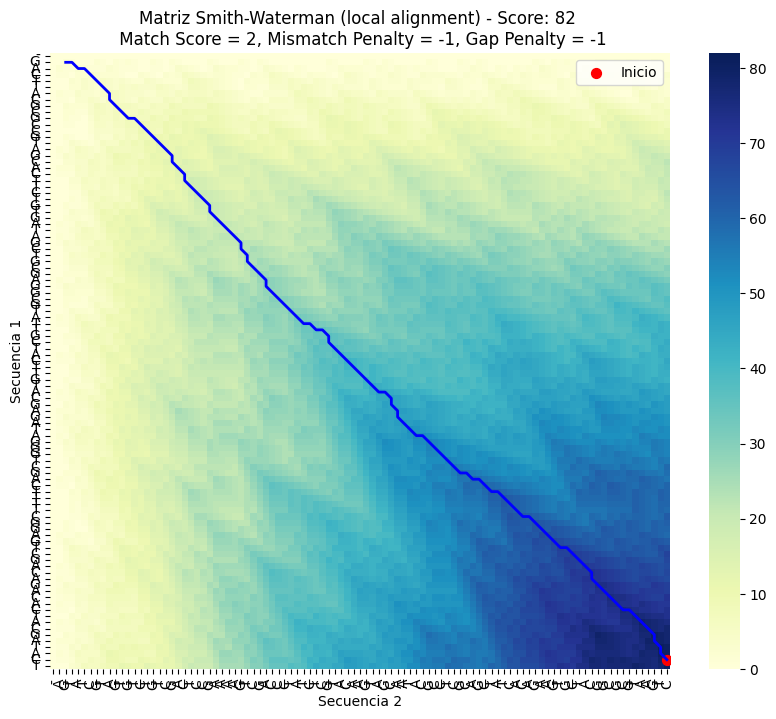

In [9]:
from alignment import smith_waterman
a = smith_waterman("GACTTACGCGCCGTAGCACTTCTGTGATAGCTGCGAGGCGTATTGCTACTTGTACGAGATAGGGTCGACTTTTCGGAGTCGACAGACACTACGATACT",
                             "AGTATCGTAGTGTCTGTCGACTCCGAAAAGTCGACCCTATCTCGTACAAGTAGCAATACGCCTCGCAGCTATCACAGAAGTGCTACGGCGCGTAAGTC",
                             2,-1,-1)

# <font color= #bbc28d> **Smith-Waterman** </font>

aquí va el código cuando me digne a ponerlo